In [2]:
pip install findiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 5.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import scipy as sp
from scipy import constants as const
from scipy.optimize import minimize
import matplotlib.pylab as plt
from findiff import FinDiff, coefficients, Coefficient

In [1]:
def psi(c, x,L):
    psi = (c[0] * ((x-L/2) ** 3)) + (c[1] * ((x-L/2) ** 2)) + (c[2] * (x-L/2)) + c[3]
    norm=np.sum(np.square(np.array(psi)))*np.abs(x[1]-x[0])
    return np.array(psi)/np.sqrt(norm)

In [2]:
c = [0, -1, 0, 20]
x = np.linspace(0, 10, 10)
L = 10
psi(c,x,L)

NameError: name 'np' is not defined

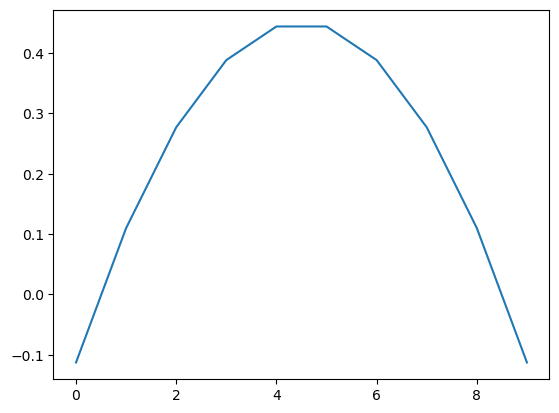

In [4]:
plt.plot(psi(c,x,L))

In [5]:
def d2psi_dx2(c, x,L):
    dx = x[1] - x[0]
    d2_dx2 = FinDiff(0, dx, 2)
    d2psi_dx2 = d2_dx2(psi(c, x,L))
    return d2psi_dx2

In [6]:
d2psi_dx2(c,x,L)

array([-0.04512348, -0.04512348, -0.04512348, -0.04512348, -0.04512348,
       -0.04512348, -0.04512348, -0.04512348, -0.04512348, -0.04512348])

In [103]:
def V(c, x, L):
    V = []
    buffer=0.2
    for i in x:
        if (0+buffer) < i and i < (L-buffer):
            V.append(0)
        else:
                V.append(75)
    return V

In [104]:
V(c,x,L)

[75, 0, 0, 0, 0, 0, 0, 0, 0, 75]

In [105]:
def T(c, x,L):
    T = (- 1/2) * d2psi_dx2(c, x,L)
    return T

In [106]:
#test
T(c,x,L)

array([0.02256174, 0.02256174, 0.02256174, 0.02256174, 0.02256174,
       0.02256174, 0.02256174, 0.02256174, 0.02256174, 0.02256174])

In [107]:
def E(c,L,x):
    mydx=np.abs(x[1]-x[0]) #compute spacing between points
    E=np.array(psi(c, x,L))*np.array(T(c,x,L))+np.square(np.array(psi(c,x,L)))*np.array(V(c,x,L))
    #print(E)
    #wave function is normalised from the start
    #psipsi=np.square(np.array(psi(c,x,L)))
    #print(np.sum(psipsi)*mydx)
    return((np.sum(E))*mydx) #/(mydx*np.sum(psipsi)))

In [113]:
E(c,L,x)

2.1764789551949315

In [114]:
np.pi**2/(2*L**2)

0.04934802200544679

In [115]:
def mini(c,L,pts):
    x = np.linspace(0, L, pts)
    return(E(c,L,x))

bounds = [(-L,L), (-L, L), (-L, L), (-L**2,L**2)]
res=minimize(mini,[1/4,1/4,1/4,10],args=(10,200),bounds=bounds)

# Print the optimized coefficients
print("Optimized coefficients:", res.x, res.fun)

Optimized coefficients: [-1.09869848e-06 -4.11385630e-01  2.65309752e-05  1.00285673e+01] 0.05434666819236958


In [111]:
vals=[]
for i in range(10,1000,10):
    res=minimize(mini,[1/4,1/4,1/4,1/4],args=(10,i),bounds=bounds)
    vals.append(res.fun)

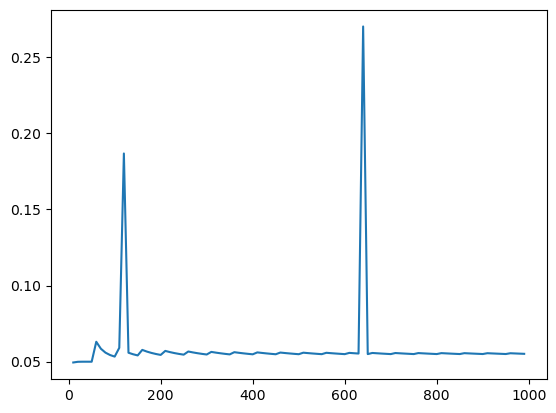

In [112]:
plt.plot(range(10,1000,10),vals)

In [116]:
from scipy.optimize import differential_evolution,dual_annealing

def mini(c):
    L = 10
    x = np.linspace(0, 10, 500)
    return(E(c,L,x))

bounds = [(-L**2,L**2), (-L**2, L**2), (-L**2, L**2), (-L**2, L**2)]
rnew=differential_evolution(mini,bounds,maxiter=1000, popsize=1500)
print(rnew.fun)

0.05482064322917474


In [ ]:
# Print the optimized coefficients
print("Optimized coefficients:", rnew.x)

In [ ]:
plt.plot(psi(res.x,x,L),label='mini')
plt.plot(psi(rnew.x,x,L),label='diffE')
plt.legend()
plt.show()